In [7]:
import numpy as np
from scipy.stats import beta
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
class Bandits(object):
    '''
    the class represents n bandits
    
    parameters:
        probs: probabilities for the individual bandits >0, <1
        n_times: how many repeats are allocated to bandit i
        arm: which bandit to use
    methods:
        pull: computes no of successes for chosen bandit
    '''
    def __init__(self, probs):
        self.p = probs
    
    def pull(self, n_times):
        return np.random.binomial(n_times, self.p)

In [3]:
def sim_probopt(y, n, ndraws):
    k = len(y)
    res = np.transpose([beta.rvs(y+1, n-y+1, size=ndraws) for y, n in zip(y,n)])
    #print res
    winner = np.transpose([np.where(x==m, 1, 0) for x,m in zip(res, np.amax(res, axis=1))])
    #print winner
    return np.sum(winner, axis=1) / float(len(winner[0]))

In [4]:
class Thompson_Sampling_Batch( object ):
    """
    Implements an online, learning strategy to solve
    the Multi-Armed Bandit problem.
    
    methods:
        sample_bandits(n): sample and train.
    attributes:
        N: the cumulative number of samples
        choices: the historical choices as a (N,) array
        bb_score: the historical score as a (N,) array
    """
    
    def __init__(self, bandits):
        
        self.bandits = bandits
        n_bandits = len(self.bandits.p)
        self.wins = np.zeros( n_bandits )
        self.trials = np.zeros(n_bandits )
        self.N = 0
        self.choices = []
    
    def sample_bandits(self):
        
        #sample from the bandits's priors and normalize them so the sum is 1
        #probs = compute_probopt(self.wins, self.trials)
        probs = sim_probopt(self.wins, self.trials, 1000)
        nchoice = map(int, 100 * probs)
        
        #sample the bandits with chosen distribution
        result = self.bandits.pull(nchoice)

        #update priors and score
        self.wins = [x + y for x, y in zip(self.wins, result)]
        self.trials = [x + y for x, y in zip(self.trials, nchoice)]
        self.N += 100
        
        #print self.wins, self.trials, result, nchoice
        self.choices = np.r_[ self.choices, nchoice ]
        return nchoice
    
    def get_probs(self):
        return np.array(self.trials) / float(self.N) if self.N>0 else [1/float(len(self.trials))]*len(self.trials)

[162869, 15060, 2016, 16443]


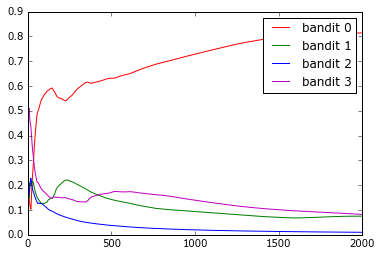

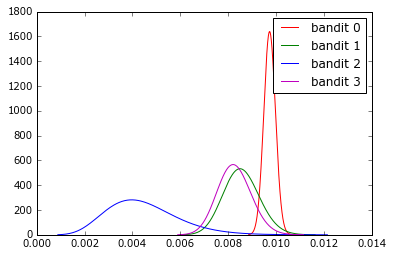

In [13]:
n_samp = 2000

pars = [.01, .009, .005, .007]

bandits = Bandits(pars)
thompson = Thompson_Sampling_Batch(bandits)

result = []
probs = []
for i in range(n_samp):
    probs.append(thompson.get_probs())
    pred = thompson.sample_bandits()
    result.append(pred)

count = [sum(r) for r in zip(*result)]
print count

# plotting allocation probabilities
fig, ax = plt.subplots(1,1)
for i,color in zip(range(len(pars)),['r','g','b','m']):
    ax.plot(zip(*probs)[i], color+'-', label='bandit '+str(i))
ax.legend()

# plot beta-pdfs for different 
fig, ax = plt.subplots(1,1)
for i,color in zip(range(len(pars)),['r','g','b','m']):
    x = np.linspace(beta.ppf(0.0001, thompson.wins[i], thompson.trials[i]-thompson.wins[i]), beta.ppf(0.9999, thompson.wins[i], thompson.trials[i]-thompson.wins[i]), 300)
    ax.plot(x, beta.pdf(x, thompson.wins[i], thompson.trials[i]-thompson.wins[i]), color+'-', label='bandit '+str(i))
ax.legend()
plt.show()

In [14]:
n_samp = 1000
pars = [.01, .008, .005, .007] # realistic 0.01
nruns = 100

bandits = Bandits(pars)

winner = []
for n in range(nruns):
    thompson = Thompson_Sampling_Batch(bandits)
    probs = []
    result = []
    for i in range(n_samp):
        probs.append(thompson.get_probs())
        pred = thompson.sample_bandits()
        result.append(pred)

    count = [sum(r) for r in zip(*result)]
    winner.append(np.argmax(count))
Counter(winner)

Counter({0: 100})

In [15]:
n_samp = 1000
pars = [.01, .009, .005, .007] # realistic 0.01
nruns = 100

bandits = Bandits(pars)

winner = []
for n in range(nruns):
    thompson = Thompson_Sampling_Batch(bandits)
    probs = []
    result = []
    for i in range(n_samp):
        probs.append(thompson.get_probs())
        pred = thompson.sample_bandits()
        result.append(pred)

    count = [sum(r) for r in zip(*result)]
    winner.append(np.argmax(count))
Counter(winner)

Counter({0: 86, 1: 14})